In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
slim = tf.contrib.slim

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
# x_train = np.load("reshaped_14.npy")
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [24]:
x=tf.placeholder('float',[None,784])
zt = tf.placeholder('float',[None,256])
y=tf.placeholder('float')

In [25]:
def encoder(data):
    X = data
    X = slim.fully_connected(X,256,activation_fn=tf.nn.relu)
    mean = slim.fully_connected(X,256,activation_fn = tf.nn.relu)
    log_var = slim.fully_connected(X,256, activation_fn = tf.nn.relu)
    Z = mean + tf.exp(log_var*0.5)*np.random.normal(0,1)
    return [mean, log_var, Z]

def decoder(data):
    X = data
    output = slim.fully_connected(X,784,activation_fn=tf.nn.sigmoid)
    return output

In [46]:
batch_size = 600
saver = tf.train.Saver()
def train(x):
    [mean, log_var, Z]=encoder(x)
    print(tf.shape(Z))
    output = decoder(Z)
    print(tf.shape(output))
    img_loss = tf.reduce_sum(tf.squared_difference(x, output))
    print(img_loss.shape)
    latent_loss = -0.5 * tf.reduce_sum((1.0 + log_var - tf.square(mean) - tf.exp(log_var)))
    print(latent_loss.shape)
    cost = tf.reduce_mean(img_loss + latent_loss)
    optimizer=tf.train.AdamOptimizer().minimize(cost)
    hm_epochs=1000

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(hm_epochs):
            epoch_loss=0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x,_ = mnist.train.next_batch(batch_size, shuffle=True)
                _,c=sess.run([optimizer,cost],feed_dict={x: epoch_x})
                epoch_loss += c
            print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:',epoch_loss)
    
        
        saver.save(sess,'./model.ckpt')
        
#         inp = tf.random_normal(mean=0,stddev=1,shape=tf.shape(Z))
#         output = decoder(zt)
#         out = sess.run(output, feed_dict={zt:inp})
#     return out

In [47]:
train(x)

Tensor("Shape_34:0", shape=(2,), dtype=int32)
Tensor("Shape_35:0", shape=(2,), dtype=int32)
()
()
('Epoch', 0, 'completed out of', 1000, 'loss:', 3238296.966796875)
('Epoch', 1, 'completed out of', 1000, 'loss:', 2652826.037109375)
('Epoch', 2, 'completed out of', 1000, 'loss:', 2266094.66015625)
('Epoch', 3, 'completed out of', 1000, 'loss:', 1969950.361328125)
('Epoch', 4, 'completed out of', 1000, 'loss:', 1767972.515625)
('Epoch', 5, 'completed out of', 1000, 'loss:', 1619535.962890625)
('Epoch', 6, 'completed out of', 1000, 'loss:', 1501156.8447265625)
('Epoch', 7, 'completed out of', 1000, 'loss:', 1406174.90234375)
('Epoch', 8, 'completed out of', 1000, 'loss:', 1325495.546875)
('Epoch', 9, 'completed out of', 1000, 'loss:', 1257324.24609375)
('Epoch', 10, 'completed out of', 1000, 'loss:', 1197602.1533203125)
('Epoch', 11, 'completed out of', 1000, 'loss:', 1145671.0244140625)
('Epoch', 12, 'completed out of', 1000, 'loss:', 1098756.09375)
('Epoch', 13, 'completed out of', 1000

('Epoch', 120, 'completed out of', 1000, 'loss:', 320772.5700683594)
('Epoch', 121, 'completed out of', 1000, 'loss:', 319556.3103027344)
('Epoch', 122, 'completed out of', 1000, 'loss:', 318281.5710449219)
('Epoch', 123, 'completed out of', 1000, 'loss:', 315854.2629394531)
('Epoch', 124, 'completed out of', 1000, 'loss:', 315492.3581542969)
('Epoch', 125, 'completed out of', 1000, 'loss:', 313481.2236328125)
('Epoch', 126, 'completed out of', 1000, 'loss:', 312642.08837890625)
('Epoch', 127, 'completed out of', 1000, 'loss:', 311429.52587890625)
('Epoch', 128, 'completed out of', 1000, 'loss:', 309584.6484375)
('Epoch', 129, 'completed out of', 1000, 'loss:', 308512.43603515625)
('Epoch', 130, 'completed out of', 1000, 'loss:', 307493.85205078125)
('Epoch', 131, 'completed out of', 1000, 'loss:', 306421.1481933594)
('Epoch', 132, 'completed out of', 1000, 'loss:', 304539.044921875)
('Epoch', 133, 'completed out of', 1000, 'loss:', 304125.5041503906)
('Epoch', 134, 'completed out of',

('Epoch', 239, 'completed out of', 1000, 'loss:', 227164.53662109375)
('Epoch', 240, 'completed out of', 1000, 'loss:', 226735.41357421875)
('Epoch', 241, 'completed out of', 1000, 'loss:', 226799.50463867188)
('Epoch', 242, 'completed out of', 1000, 'loss:', 226167.91552734375)
('Epoch', 243, 'completed out of', 1000, 'loss:', 225439.32641601562)
('Epoch', 244, 'completed out of', 1000, 'loss:', 225550.41137695312)
('Epoch', 245, 'completed out of', 1000, 'loss:', 224319.57836914062)
('Epoch', 246, 'completed out of', 1000, 'loss:', 224185.5166015625)
('Epoch', 247, 'completed out of', 1000, 'loss:', 223761.03564453125)
('Epoch', 248, 'completed out of', 1000, 'loss:', 223180.62158203125)
('Epoch', 249, 'completed out of', 1000, 'loss:', 223317.01806640625)
('Epoch', 250, 'completed out of', 1000, 'loss:', 222494.990234375)
('Epoch', 251, 'completed out of', 1000, 'loss:', 222380.47045898438)
('Epoch', 252, 'completed out of', 1000, 'loss:', 221655.0703125)
('Epoch', 253, 'completed o

('Epoch', 357, 'completed out of', 1000, 'loss:', 189462.31591796875)
('Epoch', 358, 'completed out of', 1000, 'loss:', 189305.8641357422)
('Epoch', 359, 'completed out of', 1000, 'loss:', 188923.3350830078)
('Epoch', 360, 'completed out of', 1000, 'loss:', 188249.21166992188)
('Epoch', 361, 'completed out of', 1000, 'loss:', 189169.6192626953)
('Epoch', 362, 'completed out of', 1000, 'loss:', 188566.08715820312)
('Epoch', 363, 'completed out of', 1000, 'loss:', 187474.9393310547)
('Epoch', 364, 'completed out of', 1000, 'loss:', 187557.7830810547)
('Epoch', 365, 'completed out of', 1000, 'loss:', 188342.07458496094)
('Epoch', 366, 'completed out of', 1000, 'loss:', 187178.16259765625)
('Epoch', 367, 'completed out of', 1000, 'loss:', 186747.25354003906)
('Epoch', 368, 'completed out of', 1000, 'loss:', 186699.20874023438)
('Epoch', 369, 'completed out of', 1000, 'loss:', 186536.06774902344)
('Epoch', 370, 'completed out of', 1000, 'loss:', 186834.9111328125)
('Epoch', 371, 'completed 

('Epoch', 476, 'completed out of', 1000, 'loss:', 167425.08850097656)
('Epoch', 477, 'completed out of', 1000, 'loss:', 167490.65600585938)
('Epoch', 478, 'completed out of', 1000, 'loss:', 166994.09313964844)
('Epoch', 479, 'completed out of', 1000, 'loss:', 166987.3046875)
('Epoch', 480, 'completed out of', 1000, 'loss:', 167696.35229492188)
('Epoch', 481, 'completed out of', 1000, 'loss:', 166718.30590820312)
('Epoch', 482, 'completed out of', 1000, 'loss:', 166148.79455566406)
('Epoch', 483, 'completed out of', 1000, 'loss:', 167117.45776367188)
('Epoch', 484, 'completed out of', 1000, 'loss:', 166322.953125)
('Epoch', 485, 'completed out of', 1000, 'loss:', 165983.53833007812)
('Epoch', 486, 'completed out of', 1000, 'loss:', 166095.13830566406)
('Epoch', 487, 'completed out of', 1000, 'loss:', 165479.90625)
('Epoch', 488, 'completed out of', 1000, 'loss:', 165658.1943359375)
('Epoch', 489, 'completed out of', 1000, 'loss:', 165380.24365234375)
('Epoch', 490, 'completed out of', 1

('Epoch', 594, 'completed out of', 1000, 'loss:', 152775.9532470703)
('Epoch', 595, 'completed out of', 1000, 'loss:', 153848.92309570312)
('Epoch', 596, 'completed out of', 1000, 'loss:', 152400.3604736328)
('Epoch', 597, 'completed out of', 1000, 'loss:', 152474.52465820312)
('Epoch', 598, 'completed out of', 1000, 'loss:', 153212.96325683594)
('Epoch', 599, 'completed out of', 1000, 'loss:', 152038.45678710938)
('Epoch', 600, 'completed out of', 1000, 'loss:', 152919.55151367188)
('Epoch', 601, 'completed out of', 1000, 'loss:', 152452.1414794922)
('Epoch', 602, 'completed out of', 1000, 'loss:', 151724.46228027344)
('Epoch', 603, 'completed out of', 1000, 'loss:', 151983.64001464844)
('Epoch', 604, 'completed out of', 1000, 'loss:', 151735.57299804688)
('Epoch', 605, 'completed out of', 1000, 'loss:', 152106.00170898438)
('Epoch', 606, 'completed out of', 1000, 'loss:', 152313.96948242188)
('Epoch', 607, 'completed out of', 1000, 'loss:', 151398.77001953125)
('Epoch', 608, 'complet

('Epoch', 712, 'completed out of', 1000, 'loss:', 143019.12377929688)
('Epoch', 713, 'completed out of', 1000, 'loss:', 142363.00524902344)
('Epoch', 714, 'completed out of', 1000, 'loss:', 143067.7412109375)
('Epoch', 715, 'completed out of', 1000, 'loss:', 142952.94592285156)
('Epoch', 716, 'completed out of', 1000, 'loss:', 142032.2130126953)
('Epoch', 717, 'completed out of', 1000, 'loss:', 142135.52087402344)
('Epoch', 718, 'completed out of', 1000, 'loss:', 141890.84704589844)
('Epoch', 719, 'completed out of', 1000, 'loss:', 141846.98791503906)
('Epoch', 720, 'completed out of', 1000, 'loss:', 142736.35205078125)
('Epoch', 721, 'completed out of', 1000, 'loss:', 142238.76000976562)
('Epoch', 722, 'completed out of', 1000, 'loss:', 142062.7947998047)
('Epoch', 723, 'completed out of', 1000, 'loss:', 141630.11059570312)
('Epoch', 724, 'completed out of', 1000, 'loss:', 141717.35131835938)
('Epoch', 725, 'completed out of', 1000, 'loss:', 141568.68286132812)
('Epoch', 726, 'complet

('Epoch', 830, 'completed out of', 1000, 'loss:', 134524.13513183594)
('Epoch', 831, 'completed out of', 1000, 'loss:', 134319.11352539062)
('Epoch', 832, 'completed out of', 1000, 'loss:', 134784.2540283203)
('Epoch', 833, 'completed out of', 1000, 'loss:', 134117.5235595703)
('Epoch', 834, 'completed out of', 1000, 'loss:', 134795.7373046875)
('Epoch', 835, 'completed out of', 1000, 'loss:', 134328.72521972656)
('Epoch', 836, 'completed out of', 1000, 'loss:', 133950.0128173828)
('Epoch', 837, 'completed out of', 1000, 'loss:', 134052.25915527344)
('Epoch', 838, 'completed out of', 1000, 'loss:', 134326.07580566406)
('Epoch', 839, 'completed out of', 1000, 'loss:', 134005.02221679688)
('Epoch', 840, 'completed out of', 1000, 'loss:', 133833.4239501953)
('Epoch', 841, 'completed out of', 1000, 'loss:', 134306.78637695312)
('Epoch', 842, 'completed out of', 1000, 'loss:', 133752.83044433594)
('Epoch', 843, 'completed out of', 1000, 'loss:', 133424.21643066406)
('Epoch', 844, 'completed

('Epoch', 948, 'completed out of', 1000, 'loss:', 128201.16149902344)
('Epoch', 949, 'completed out of', 1000, 'loss:', 128022.68078613281)
('Epoch', 950, 'completed out of', 1000, 'loss:', 128560.25036621094)
('Epoch', 951, 'completed out of', 1000, 'loss:', 128317.34094238281)
('Epoch', 952, 'completed out of', 1000, 'loss:', 127582.80700683594)
('Epoch', 953, 'completed out of', 1000, 'loss:', 128036.82727050781)
('Epoch', 954, 'completed out of', 1000, 'loss:', 127933.38842773438)
('Epoch', 955, 'completed out of', 1000, 'loss:', 128002.57189941406)
('Epoch', 956, 'completed out of', 1000, 'loss:', 127857.87548828125)
('Epoch', 957, 'completed out of', 1000, 'loss:', 127804.14379882812)
('Epoch', 958, 'completed out of', 1000, 'loss:', 127697.75415039062)
('Epoch', 959, 'completed out of', 1000, 'loss:', 127537.9287109375)
('Epoch', 960, 'completed out of', 1000, 'loss:', 128387.48620605469)
('Epoch', 961, 'completed out of', 1000, 'loss:', 127202.93237304688)
('Epoch', 962, 'compl

In [55]:
sess = tf.InteractiveSession()
saver.restore(sess, save_path='model.ckpt')
print("Model restored.")

INFO:tensorflow:Restoring parameters from model.ckpt


/home/legion/.local/lib/python2.7/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Model restored.


NameError: name 'output' is not defined

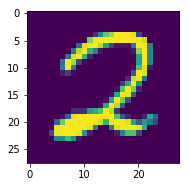

In [57]:
num_pairs = 10
image_indices = np.random.randint(0, 200, num_pairs)
n_pixels = 28*28
for pair in range(num_pairs):
    x = np.reshape(mnist.test.images[image_indices[pair]], (1,n_pixels))
    plt.figure()
    x_image = np.reshape(x, (28,28))
    plt.subplot(121)
    plt.imshow(x_image)
    x_reconstruction = output.eval(feed_dict={x: x})
    x_reconstruction_image = (np.reshape(x_reconstruction, (28,28)))
    plt.subplot(122)
    plt.imshow(x_reconstruction_image)